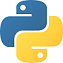
# Artificial Neural Networks (ANN) #

### Content courtesy of OUDCE and IBM, and exercise by Nick Day - September 2022 ###

## This section introduces the concept of an Artificial Neural Network (ANN) which continues from the Graph concept. <font color = 'red'> For the 2023-24 run of CO536, there are no further assessed logbook exercises. </font> There is, however, an exercise at the end of this notebook if you would like to implement a basic Artificial Neural Network.

 - The basis of a Graph class in Python is the implementation of two classes, Graph and Vertex, which establish the essential functionality to create a variety of graphs.
 - The Vertex class allows for storage of connecting vertices with a dictionary and adjustment of their edges as well.
 - The Graph class builds upon the Vertex methods and allows addition of vertices and edges, setting the directionality of edges, and determining if a path exists between two vertices.





### Reminder on Graphs

![graph_weighted](https://dist.neo4j.com/wp-content/uploads/20181010052926/dijkstras-algorithm-example-part-one.png)

# Introduction to Neural Networks

An Artificial Neural Network (ANN) is based on a biological neural network. In order to understand ANNs, it will help to quickly revisit the biological structure of a neuron. The human brain is regarded to be a humungous biological neural network, and an ANN aims to closely simulate this in order to simulate brain capacity in machines. 

![biologicalnet](https://miro.medium.com/max/610/1*SJPacPhP4KDEB1AdhOFy_Q.png)

"How a biological neuron is modelled as a mathematical function. In the above panel, we see an illustration of a biological neuron, where its dendrites receive electrical signals in from nerves and other neurons, the charge builds up in the cell-body that then fires an electric charge out of its axon after reaching some threshold of internal charge. This is modelled mathematically, as we see in the lower panel, where a number of input values, which are analogous to electrical charge incoming on biological dendrites, are summed and compared to a threshold to determine the output value returned by the function. The output is analogous to the charge outgoing on the biological axon." 
<b>Derived from Applied Go, Perceptrons- the most basic form of a neural network article, June 09, 2016</b>


Artificial neurons in a network seek to mimic certain parts of biological neurons, such as dendrites, cell bodies, and axons, using simplified mathematical models of what limited knowledge we have on their inner workings. Signals can be received from dendrites and sent down the axon once enough signals are received. This outgoing signal can then be used as another input for other neurons, repeating the process. Some signals are more important than others and can trigger some neurons to fire easier. Connections can become stronger or weaker; new connections can appear while others can cease to exist. 

Whilst there is still much more to understand about how the brain works, we can still try to mimic most of this process by coming up with a function that receives a list of weighted input signals and outputs some signal if the sum of these weighted inputs reaches a certain bias. Although this mathematical neuron is nowhere near as sophisticated as a biological one, it's still powerful enough to work with simpler tasks like classification and regression.

# Artificial Neuron 

![AN](https://miro.medium.com/max/777/1*YA-0MyBLsn8BiThBGjycIA.png)

The mathematical functions an artificial neuron performs. The inputs are represented by the x values. The weights on the inputs are represented by the w values. Each x is multiplied by its corresponding w to apply the weight to the input value. This is then summed (represented by the epsilon) and added to a bias constant, b. The total input is then passed to the activation function that determines the artificial neuron's output value, y. 

# Sigmoid function

The sigmoid function is used as an activation function in a neural network. A weighted sum of inputs is passed through this function to normalise outputs, either between 0 and 1 or -1 and +1 before the next layer of the network.

![sigmoid](https://raw.githubusercontent.com/Codecademy/docs/main/media/sigmoid-function.png)



## Linear Activation Function
![Linear](https://miro.medium.com/v2/resize:fit:1400/1*tldIgyDQWqm-sMwP7m3Bww.png)

## ReLU (Rectified Linear Unit)

The sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers due to the vanishing gradient problem.
Here's an example with the sigmoid activation function:
![sigmoid_vanishing](https://miro.medium.com/v2/resize:fit:2000/1*6A3A_rt4YmumHusvTvVTxw.png).

The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.

![Linear_RELU_](Sigmoid_linear_relu.png)

[More on ReLU here](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

![]()



## Other activation functions 

![other_activation](https://miro.medium.com/v2/resize:fit:444/1*BrcwfzrjHoHf3jfSfmE5ww.png)

![activation_functions](https://miro.medium.com/v2/resize:fit:2000/format:webp/1*Vwhp6Ia8BDT_fdGN7iJlUg.png)

## Big O notation measures growth of an algorithm (block of code which performs a function)

The notation is written as O ( f(n) ) where f(n) represents the growth rate of the algorithm in terms of the input size n

![bigo](https://cdn-media-1.freecodecamp.org/images/1*KfZYFUT2OKfjekJlCeYvuQ.jpeg)

# Layers

![ANN_hiddenlayer](https://miro.medium.com/max/1200/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png)

Multiple artificial neurons can be connected to form an ANN. In this illustration, neurons are as circles and the connections as arrows from left to right. These connections link the output of one neuron to the inputs of others. Here, we first have 3 neurons (the input layer) that feed into a layer of 4 neurons (hidden layer 1), which feed into another layer of 4 (hidden layer 2) and finally a single neuron as the output layer.



# Simple Neural Network example

![weightAndHeight](https://victorzhou.com/27cf280166d7159c0465a58c68f99b39/network3.svg)

In [2]:
# https://victorzhou.com/blog/intro-to-neural-networks/ 

import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


In [3]:
# https://victorzhou.com/blog/intro-to-neural-networks/


import numpy as np

# ... code from previous section here

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994


class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0

    # The Neuron class here is from the previous section
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7216325609518421

0.9990889488055994
0.7216325609518421


# Training a Neural Network

In [51]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.276
Epoch 10 loss: 0.073
Epoch 20 loss: 0.057
Epoch 30 loss: 0.046
Epoch 40 loss: 0.038
Epoch 50 loss: 0.032
Epoch 60 loss: 0.027
Epoch 70 loss: 0.024
Epoch 80 loss: 0.021
Epoch 90 loss: 0.018
Epoch 100 loss: 0.017
Epoch 110 loss: 0.015
Epoch 120 loss: 0.014
Epoch 130 loss: 0.013
Epoch 140 loss: 0.012
Epoch 150 loss: 0.011
Epoch 160 loss: 0.010
Epoch 170 loss: 0.010
Epoch 180 loss: 0.009
Epoch 190 loss: 0.008
Epoch 200 loss: 0.008
Epoch 210 loss: 0.008
Epoch 220 loss: 0.007
Epoch 230 loss: 0.007
Epoch 240 loss: 0.007
Epoch 250 loss: 0.006
Epoch 260 loss: 0.006
Epoch 270 loss: 0.006
Epoch 280 loss: 0.006
Epoch 290 loss: 0.005
Epoch 300 loss: 0.005
Epoch 310 loss: 0.005
Epoch 320 loss: 0.005
Epoch 330 loss: 0.005
Epoch 340 loss: 0.005
Epoch 350 loss: 0.004
Epoch 360 loss: 0.004
Epoch 370 loss: 0.004
Epoch 380 loss: 0.004
Epoch 390 loss: 0.004
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.003
Epoch 450 loss: 0.003

## <font color="red">Exercise</font> ##

Insert a 'code' cell below. In this do the following:

- 1 - Run the first neural network example above.
- 2 - Can you re-write the first neural network example to use a graph? How would you adapt the inputs, the sigmoid functions and the outputs?
- 3 - Run the second ANN example (with the training algorithm) - what do you notice?
- 4 - What is the difference between a supervised and unsupervised learning algorithm?

# References & Learning Resources on ANNs

 - ANN Resource: https://www.ibm.com/cloud/learn/neural-networks

 - Towards DataScience: https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6

 - Victor Zhao: https://victorzhou.com/blog/intro-to-neural-networks/
